### For testing data. Comparing output with Vicra

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib


In [2]:
import monai
from monai.transforms import \
    Compose, LoadImaged, AddChanneld, Orientationd, \
    Spacingd, \
    ToTensord,  \
    DataStatsd
from monai.data import list_data_collate

import torch
import pytorch_lightning as pl
from torchsummary import summary

monai.config.print_config()

MONAI version: 0.9.dev2148
Numpy version: 1.19.2
Pytorch version: 1.7.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False
MONAI rev id: 63c18670e4d46414eb3b5917fb0632e09bc3f8ed

Optional dependencies:
Pytorch Ignite version: 0.4.5
Nibabel version: 3.1.1
scikit-image version: 0.17.2
Pillow version: 8.1.0
Tensorboard version: 2.4.1
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.8.2
tqdm version: 4.62.2
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: NOT INSTALLED or UNKNOWN VERSION.
pandas version: 1.2.0
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [3]:
import sys
sys.path.append(r'../util/python')
import vicra_toolbox

In [4]:
EXAMPLE_DIR = r'/data16/public/registration-brain_PET/data/real/FDG/20161006_JO308/17988'


In [5]:
#summary_path = os.path.join(EXAMPLE_DIR,'Summary_AO101_3600_5400.csv')
#summary_path = os.path.join(EXAMPLE_DIR,'Summary_JR684_3600_5400.csv')
summary_path = os.path.join(EXAMPLE_DIR,'Summary_JO308_3600_5400.csv')
#summary_path = os.path.join(EXAMPLE_DIR,'Summary_PF605_3600_5400.csv')
#summary_path = os.path.join(EXAMPLE_DIR,'Summary_AS469_3600_5400.csv')
df = pd.read_csv(summary_path)
df.head(5)

,PatientID,InjectionID,PatientType,Listmode,ScanStartTime,InjectionTime,ScanStartTime_ms,InjectionTime_ms,ScanStart,ScanEnd,...,VC_13,VC_14,VC_21,VC_22,VC_23,VC_24,VC_31,VC_32,VC_33,VC_34
0,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3600,3601,...,-0.015246,0.966243,-0.012351,0.999896,0.007512,3.970201,0.015338,-0.007322,0.999856,1.463413
1,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3601,3602,...,-0.015653,0.897205,-0.011990,0.999907,0.006441,4.024457,0.015729,-0.006252,0.999857,1.540798
2,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3602,3603,...,-0.016690,0.612075,-0.009906,0.999934,0.005804,4.076955,0.016747,-0.005637,0.999844,1.640383
3,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3603,3604,...,-0.018802,0.160097,-0.007505,0.999935,0.008605,3.846548,0.018866,-0.008462,0.999786,1.334698
4,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3604,3605,...,-0.018867,0.274946,-0.008686,0.999855,0.014627,3.697997,0.018996,-0.014460,0.999715,0.741256


In [6]:
# Convert 12 matrix params to a single list in 'MATRIX'
matrix_cols = ['VC_11', 'VC_12', 'VC_13', 'VC_14', 'VC_21', 'VC_22','VC_23', 'VC_24', 'VC_31', 'VC_32', 'VC_33', 'VC_34']
M = df[matrix_cols].values.tolist()
df['MATRIX'] = M
df.head(5)

,PatientID,InjectionID,PatientType,Listmode,ScanStartTime,InjectionTime,ScanStartTime_ms,InjectionTime_ms,ScanStart,ScanEnd,...,VC_14,VC_21,VC_22,VC_23,VC_24,VC_31,VC_32,VC_33,VC_34,MATRIX
0,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3600,3601,...,0.966243,-0.012351,0.999896,0.007512,3.970201,0.015338,-0.007322,0.999856,1.463413,"[0.999806, 0.012464, -0.015246, 0.966243, -0.0..."
1,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3601,3602,...,0.897205,-0.011990,0.999907,0.006441,4.024457,0.015729,-0.006252,0.999857,1.540798,"[0.999804, 0.012089, -0.015653, 0.897205, -0.0..."
2,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3602,3603,...,0.612075,-0.009906,0.999934,0.005804,4.076955,0.016747,-0.005637,0.999844,1.640383,"[0.999811, 0.010002, -0.01669, 0.612075, -0.00..."
3,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3603,3604,...,0.160097,-0.007505,0.999935,0.008605,3.846548,0.018866,-0.008462,0.999786,1.334698,"[0.999794, 0.007666, -0.018802, 0.160097, -0.0..."
4,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3604,3605,...,0.274946,-0.008686,0.999855,0.014627,3.697997,0.018996,-0.014460,0.999715,0.741256,"[0.999782, 0.008962, -0.018867, 0.274946, -0.0..."


In [7]:
import sys
sys.path.append(r'../util/python')
import vicra_toolbox

df['T'] = df['MATRIX'].apply(
    lambda x: vicra_toolbox.RotTransMatrix_6Params(x, 1)
)
df.head(5)

,PatientID,InjectionID,PatientType,Listmode,ScanStartTime,InjectionTime,ScanStartTime_ms,InjectionTime_ms,ScanStart,ScanEnd,...,VC_21,VC_22,VC_23,VC_24,VC_31,VC_32,VC_33,VC_34,MATRIX,T
0,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3600,3601,...,-0.012351,0.999896,0.007512,3.970201,0.015338,-0.007322,0.999856,1.463413,"[0.999806, 0.012464, -0.015246, 0.966243, -0.0...","[0.966243, 3.970201, 1.463413, -0.430452905986..."
1,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3601,3602,...,-0.011990,0.999907,0.006441,4.024457,0.015729,-0.006252,0.999857,1.540798,"[0.999804, 0.012089, -0.015653, 0.897205, -0.0...","[0.897205, 4.024457, 1.540798, -0.369087991539..."
2,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3602,3603,...,-0.009906,0.999934,0.005804,4.076955,0.016747,-0.005637,0.999844,1.640383,"[0.999811, 0.010002, -0.01669, 0.612075, -0.00...","[0.612075, 4.076955, 1.640383, -0.332576624016..."
3,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3603,3604,...,-0.007505,0.999935,0.008605,3.846548,0.018866,-0.008462,0.999786,1.334698,"[0.999794, 0.007666, -0.018802, 0.160097, -0.0...","[0.160097, 3.846548, 1.334698, -0.493120056950..."
4,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3604,3605,...,-0.008686,0.999855,0.014627,3.697997,0.018996,-0.014460,0.999715,0.741256,"[0.999782, 0.008962, -0.018867, 0.274946, -0.0...","[0.274946, 3.697997, 0.741256, -0.838246752591..."


In [8]:
def delta_T_magnitude(T_ref, T):
    mag = np.sum(np.square(T-T_ref))
    return mag


df['delta_T'] = df['T'].apply(lambda t: delta_T_magnitude(df.loc[0,'T'], t))
df.head(5)


,PatientID,InjectionID,PatientType,Listmode,ScanStartTime,InjectionTime,ScanStartTime_ms,InjectionTime_ms,ScanStart,ScanEnd,...,VC_22,VC_23,VC_24,VC_31,VC_32,VC_33,VC_34,MATRIX,T,delta_T
0,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3600,3601,...,0.999896,0.007512,3.970201,0.015338,-0.007322,0.999856,1.463413,"[0.999806, 0.012464, -0.015246, 0.966243, -0.0...","[0.966243, 3.970201, 1.463413, -0.430452905986...",0.000000
1,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3601,3602,...,0.999907,0.006441,4.024457,0.015729,-0.006252,0.999857,1.540798,"[0.999804, 0.012089, -0.015653, 0.897205, -0.0...","[0.897205, 4.024457, 1.540798, -0.369087991539...",0.018469
2,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3602,3603,...,0.999934,0.005804,4.076955,0.016747,-0.005637,0.999844,1.640383,"[0.999811, 0.010002, -0.01669, 0.612075, -0.00...","[0.612075, 4.076955, 1.640383, -0.332576624016...",0.204485
3,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3603,3604,...,0.999935,0.008605,3.846548,0.018866,-0.008462,0.999786,1.334698,"[0.999794, 0.007666, -0.018802, 0.160097, -0.0...","[0.160097, 3.846548, 1.334698, -0.493120056950...",0.802766
4,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3604,3605,...,0.999855,0.014627,3.697997,0.018996,-0.014460,0.999715,0.741256,"[0.999782, 0.008962, -0.018867, 0.274946, -0.0...","[0.274946, 3.697997, 0.741256, -0.838246752591...",1.323131


In [9]:
def Relative_motion_A_to_B_12(img_vc1, img_vc2):
    A = np.pad(img_vc1, pad_width=1)
    B = np.pad(img_vc2, pad_width=1)
    R = vicra_toolbox.Relative_motion_A_to_B(A, B)
    return R[1:13]

df['relative_T'] = df['MATRIX'].apply(lambda t: 
                                 vicra_toolbox.RotTransMatrix_6Params(
                                     Relative_motion_A_to_B_12(df.loc[0,'MATRIX'], t), 1)
                                 )
df['delta_relative_T'] = df['relative_T'].apply(lambda t: delta_T_magnitude(df.loc[0,'relative_T'], t))

df.head(5)

,PatientID,InjectionID,PatientType,Listmode,ScanStartTime,InjectionTime,ScanStartTime_ms,InjectionTime_ms,ScanStart,ScanEnd,...,VC_24,VC_31,VC_32,VC_33,VC_34,MATRIX,T,delta_T,relative_T,delta_relative_T
0,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3600,3601,...,3.970201,0.015338,-0.007322,0.999856,1.463413,"[0.999806, 0.012464, -0.015246, 0.966243, -0.0...","[0.966243, 3.970201, 1.463413, -0.430452905986...",0.000000,"[1.1102230246251565e-16, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000
1,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3601,3602,...,4.024457,0.015729,-0.006252,0.999857,1.540798,"[0.999804, 0.012089, -0.015653, 0.897205, -0.0...","[0.897205, 4.024457, 1.540798, -0.369087991539...",0.018469,"[-0.06850777672739772, 0.052823153834697045, 0...",0.018429
2,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3602,3603,...,4.076955,0.016747,-0.005637,0.999844,1.640383,"[0.999811, 0.010002, -0.01669, 0.612075, -0.00...","[0.612075, 4.076955, 1.640383, -0.332576624016...",0.204485,"[-0.352703450872904, 0.1010324750674867, 0.183...",0.204064
3,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3603,3604,...,3.846548,0.018866,-0.008462,0.999786,1.334698,"[0.999794, 0.007666, -0.018802, 0.160097, -0.0...","[0.160097, 3.846548, 1.334698, -0.493120056950...",0.802766,"[-0.8064367918176265, -0.13274568785587215, -0...",0.803294
4,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3604,3605,...,3.697997,0.018996,-0.014460,0.999715,0.741256,"[0.999782, 0.008962, -0.018867, 0.274946, -0.0...","[0.274946, 3.697997, 0.741256, -0.838246752591...",1.323131,"[-0.6988775966646525, -0.2755042448730607, -0....",1.325611


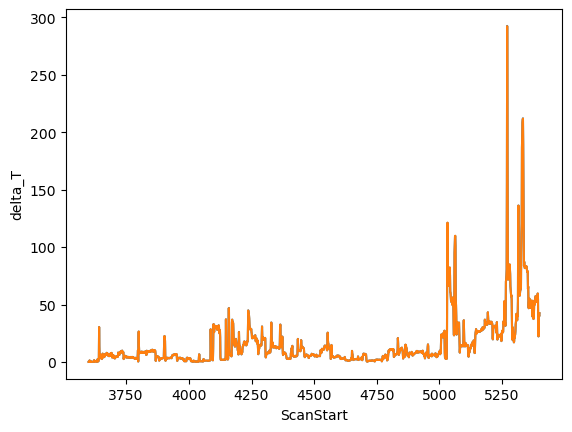

In [10]:
import seaborn as sns

ax = sns.lineplot(data=df, x="ScanStart", y="delta_T")
ax = sns.lineplot(data=df, x="ScanStart", y="delta_relative_T")
plt.show()

In [11]:
#building transform
SPACING = [8.0]*3
KEYS = ['ThreeD_Cloud_ref','ThreeD_Cloud_mov']
SIZE = (32,32,32)


train_transforms = Compose([
    LoadImaged(keys=KEYS, reader='NibabelReader', as_closest_canonical=False),
    AddChanneld(keys=KEYS),
    Orientationd(keys=KEYS, axcodes='RAS'),
    ToTensord(keys=KEYS)    
])

In [12]:
class PETRegNet(pl.LightningModule):
    
    def __init__(self, dropout=0.0):
        super().__init__()
        
        self.dropout = dropout
        
        self.feature_extractor = monai.networks.nets.DenseNet(
            spatial_dims=3, 
            in_channels=1, 
            out_channels=128,
            init_features=64, 
            growth_rate=32,
            dropout_prob=self.dropout
        )

        self.fwt_layers = torch.nn.Sequential(
            torch.nn.Linear(1, 32),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(64, 128*2),            
        )

        self.regression_layers = torch.nn.Sequential(
            torch.nn.Linear(128*2, 256),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(256, 128),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(128, 6),
        )
        
        self.loss_function = torch.nn.MSELoss()
        
    def forward(self, x1, x2, x_t):
        y1 = self.feature_extractor(x1)
        y2 = self.feature_extractor(x2)
        y = torch.cat([y1,y2], dim=-1)
        
        x_t=x_t.float()
        x_fwt = self.fwt_layers(torch.transpose(x_t[None],0,-1))
        y = torch.mul(y, x_fwt)
        y = self.regression_layers(y)
        return y

    
    def prepare_data(self):
        # set deterministic training for reproducibility
        monai.utils.misc.set_determinism(seed=42)
    
    
    def training_step(self, batch, batch_idx):
        x1 = batch["ThreeD_Cloud_ref"]
        x2 = batch["ThreeD_Cloud_mov"]
        xt= batch["delta_t"]
        transforms = batch["T"].float()
        outputs = self.forward(x1,x2,xt)

        loss = self.loss_function(outputs, transforms)        
        return {"loss": loss}
        
    
    def training_epoch_end(self, outputs):
        # Calculate the average loss
        avg_loss = torch.stack([x['loss'] for x in outputs]).mean()
        # Logging at the end of every epoch
        self.logger.experiment.add_scalar('Train/Loss', avg_loss, self.current_epoch)
    
    
    def validation_step(self, batch, batch_idx):
        x1 = batch["ThreeD_Cloud_ref"]
        x2 = batch["ThreeD_Cloud_mov"]
        xt= batch["delta_t"]
        transforms = batch["T"].float()
        outputs = self.forward(x1,x2,xt)
        
        loss = self.loss_function(outputs, transforms)
        return {"val_loss": loss}

    
    def validation_epoch_end(self, outputs):
        # Calculate the average loss
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        # Logging at the end of every epoch
        self.logger.experiment.add_scalar('Val/Loss', avg_loss, self.current_epoch)

        # Log the value for model checkpoint saving
        self.log('val_loss', avg_loss)

    def configure_optimizers(self):
        total_params = list(self.feature_extractor.parameters()) + list(self.regression_layers.parameters()) + list(self.fwt_layers.parameters())
        opt = torch.optim.Adam(total_params, lr=5e-4)
        scheduler = {'scheduler': torch.optim.lr_scheduler.StepLR(optimizer=opt, step_size=100, gamma=0.98),
                     'name': 'Learning Rate'}
        return [opt], [scheduler]

In [13]:
from torchinfo import summary
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = PETRegNet().to(device)
summary(model, [(1,1,32,32,32),(1,1,32,32,32),(1,1)])

Layer (type:depth-idx)                             Output Shape              Param #
PETRegNet                                          --                        --
├─DenseNet: 1-1                                    [1, 128]                  --
│    └─Sequential: 2-1                             [1, 1024, 1, 1, 1]        --
│    │    └─Conv3d: 3-1                            [1, 64, 16, 16, 16]       21,952
│    │    └─BatchNorm3d: 3-2                       [1, 64, 16, 16, 16]       128
│    │    └─ReLU: 3-3                              [1, 64, 16, 16, 16]       --
│    │    └─MaxPool3d: 3-4                         [1, 64, 8, 8, 8]          --
│    │    └─_DenseBlock: 3-5                       [1, 256, 8, 8, 8]         777,408
│    │    └─_Transition: 3-6                       [1, 128, 4, 4, 4]         33,280
│    │    └─_DenseBlock: 3-7                       [1, 512, 4, 4, 4]         1,804,416
│    │    └─_Transition: 3-8                       [1, 256, 2, 2, 2]         132,096
│    │   

In [14]:
#initialize the process for building a legal dataset
df_backup = df

In [15]:
MODEL_PATH = os.path.join('.','/data16/private/tz323/dev/dl-hmc/notebooks/saved_model_miccai')
print('MODEL_PATH={}'.format(MODEL_PATH))

MODEL_PATH=/data16/private/tz323/dev/dl-hmc/notebooks/saved_model_miccai


In [16]:
df_backup.head(2)

,PatientID,InjectionID,PatientType,Listmode,ScanStartTime,InjectionTime,ScanStartTime_ms,InjectionTime_ms,ScanStart,ScanEnd,...,VC_24,VC_31,VC_32,VC_33,VC_34,MATRIX,T,delta_T,relative_T,delta_relative_T
0,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3600,3601,...,3.970201,0.015338,-0.007322,0.999856,1.463413,"[0.999806, 0.012464, -0.015246, 0.966243, -0.0...","[0.966243, 3.970201, 1.463413, -0.430452905986...",0.000000,"[1.1102230246251565e-16, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000
1,JO308,17988,Real,/data5/hrrt/20161006_JO308/JO308-Human-2016.10...,12:56:04,12:56:12,46564000,46572000,3601,3602,...,4.024457,0.015729,-0.006252,0.999857,1.540798,"[0.999804, 0.012089, -0.015653, 0.897205, -0.0...","[0.897205, 4.024457, 1.540798, -0.369087991539...",0.018469,"[-0.06850777672739772, 0.052823153834697045, 0...",0.018429


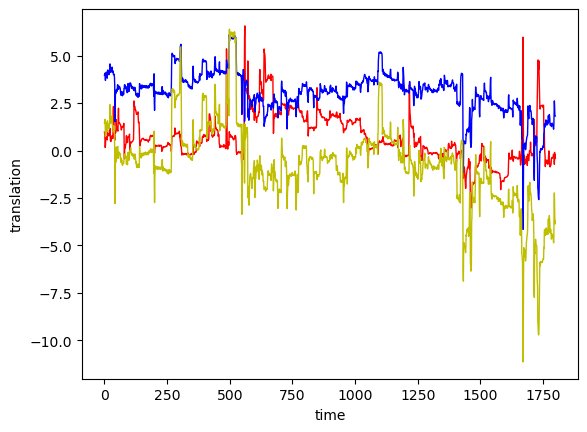

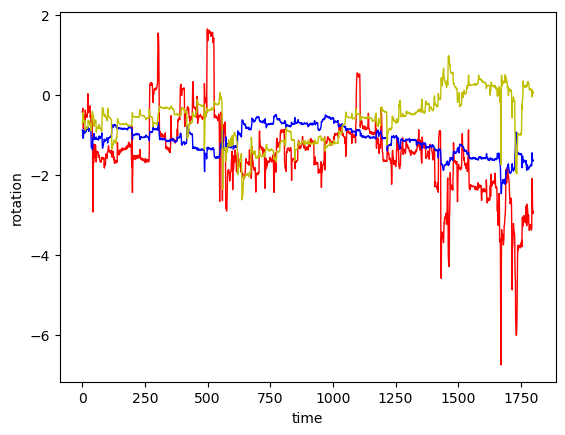

In [17]:
# Plot vicra curve
trans_x = np.zeros(1800)
trans_y = np.zeros(1800)
trans_z = np.zeros(1800)
rot_x = np.zeros(1800)
rot_y = np.zeros(1800)
rot_z = np.zeros(1800)
for i in range(1800):
    temp = df_backup.at[i,'T']
    trans_x[i] = temp[0]
    trans_y[i] = temp[1]
    trans_z[i] = temp[2]
    rot_x[i] = temp[3]
    rot_y[i] = temp[4]
    rot_z[i] = temp[5]
x1=range(1800)
plt.plot(x1,trans_x,label='trans_x',linewidth=1,color='r') 
plt.plot(x1,trans_y,label='trans_y',linewidth=1,color='b')
plt.plot(x1,trans_z,label='trans_z',linewidth=1,color='y')  
plt.xlabel('time') 
plt.ylabel('translation') 
plt.show()
plt.plot(x1,rot_x,label='rot_x',linewidth=1,color='r') 
plt.plot(x1,rot_y,label='rot_y',linewidth=1,color='b')
plt.plot(x1,rot_z,label='rot_z',linewidth=1,color='y')  
plt.xlabel('time') 
plt.ylabel('rotation') 
plt.show()

# Inference test

In [18]:
#Building inference test data
df = df_backup

df_input_diff1 = vicra_toolbox.build_netinput_fixed_reference(df)

df_input_diff = df_input_diff1.reset_index()
final_cols = ['PatientID','InjectionID','PatientType',
                   'ThreeD_Cloud_ref', 'ThreeD_Cloud_mov', 'COD_nomask_ref', 'COD_nomask_mov', 'T', 'delta_t']
df_input_diff = df_input_diff[final_cols]
df_input_diff.head(5)

#building inference test dataloader
test_dict = df_input_diff.to_dict('records')

for i in range(len(test_dict)):
    x = test_dict[i]['ThreeD_Cloud_ref'].find('nii')
    fn_cloud1 = test_dict[i]['ThreeD_Cloud_ref'][0:x] + 'nii_monai_resize'
    x = x+3
    y = test_dict[i]['ThreeD_Cloud_ref'].find('3dcld')
    fn_cloud2 =  test_dict[i]['ThreeD_Cloud_ref'][x:y] + '3dcld_monai_rz.nii'
    test_dict[i]['ThreeD_Cloud_ref'] = fn_cloud1 + fn_cloud2
    
    x = test_dict[i]['ThreeD_Cloud_mov'].find('nii')
    fn_cloud1 = test_dict[i]['ThreeD_Cloud_mov'][0:x] + 'nii_monai_resize'
    x = x+3
    y = test_dict[i]['ThreeD_Cloud_mov'].find('3dcld')
    fn_cloud2 =  test_dict[i]['ThreeD_Cloud_mov'][x:y] + '3dcld_monai_rz.nii'
    test_dict[i]['ThreeD_Cloud_mov'] = fn_cloud1 + fn_cloud2

# Create the Dataset
ds_test = monai.data.CacheDataset(data=test_dict, transform=train_transforms)
# Create the DataLoader
test_loader = monai.data.DataLoader(ds_test, batch_size=32, num_workers=2, collate_fn=list_data_collate)

Loading dataset: 100%|██████████| 1800/1800 [00:19<00:00, 93.15it/s] 


In [20]:
#calculate loss function and network output
saved_model_path = os.path.join(MODEL_PATH,'PETRegNet-epoch=39699-val_loss=0.098.ckpt')
loaded_model = PETRegNet.load_from_checkpoint(saved_model_path)

loaded_model.eval()
loaded_model.to(device)
loss = 0
loss_list = list()
time_list = list()
prediction_list = list()
y_list = list()
loss1 = []
i=0
for test_data in test_loader:
    x1 = test_data['ThreeD_Cloud_ref'].to(device)
    x2 = test_data['ThreeD_Cloud_mov'].to(device)
    x_t = test_data['delta_t'].to(device)
    time = test_data['delta_t']
    y = test_data['T'].cpu().numpy()
    # print(test_data.keys())
    y_test = loaded_model(x1, x2, x_t).detach().cpu().numpy()

    loss = y-y_test
    l = len(loss)
    for j in range(l):
        loss1=sum(np.square(loss[j]))/len(loss[j])
        loss_list.append(loss1)
        time_list.append(time.numpy()[j])
        prediction_list.append(y_test[j])
        y_list.append(y[j])
    
    i = i + 1


df_results = pd.DataFrame()
df_results['Time'] = time_list
df_results['Loss'] = loss_list

,Time,Loss
0,0,0.020278
1,1,0.023337
2,2,0.017935
3,3,0.021985
4,4,0.033645
...,...,...
1795,1795,0.006874
1796,1796,0.009080
1797,1797,0.010584
1798,1798,0.011227


In [21]:
df_results.describe()

,Time,Loss
count,1800.00000,1800.000000
mean,899.50000,0.023503
std,519.75956,0.036358
min,0.00000,0.001438
25%,449.75000,0.010934
50%,899.50000,0.016617
75%,1349.25000,0.024938
max,1799.00000,0.786947


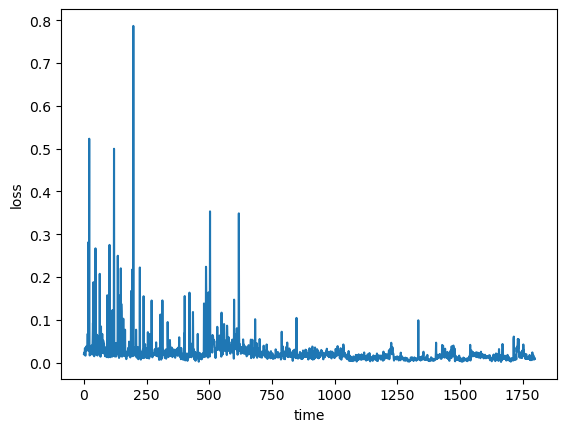

In [22]:
df_results['Loss'].plot()
plt.xlabel('time') 
plt.ylabel('loss') 
plt.show()

In [23]:
len(y_list)
Y = np.concatenate(y_list, axis=0)
Y_test = np.concatenate(prediction_list, axis=0)
Y_test.resize(1800,6)
Y.resize(1800,6)
D = Y-Y_test
D.resize(1799,6)

np.mean(D, axis=0)

array([-0.01952626,  0.02837139, -0.16952931, -0.12925867, -0.06051723,
       -0.07292804])

In [26]:
#build predictions
trans_x_n = np.zeros(1800)
trans_y_n = np.zeros(1800)
trans_z_n = np.zeros(1800)
rot_x_n = np.zeros(1800)
rot_y_n = np.zeros(1800)
rot_z_n = np.zeros(1800)
temp = df_backup.at[0,'T']
trans_x_n[0] = temp[0]
trans_y_n[0] = temp[1]
trans_z_n[0] = temp[2]
rot_x_n[0] = temp[3]
rot_y_n[0] = temp[4]
rot_z_n[0] = temp[5]
l_6 = list()
l_13 = list()
parameter13_3600 = vicra_toolbox.RotTransMatrix_6Params(temp, 2)
for i in range(1799):
    l_6 = Y_test[i,:]
    l_13 = vicra_toolbox.RotTransMatrix_6Params(l_6, 2)
    l_6 = vicra_toolbox.DL_HMC_concat_VC_zty(parameter13_3600,l_13)
    trans_x_n[i+1] = l_6[0]
    trans_y_n[i+1] = l_6[1]
    trans_z_n[i+1] = l_6[2]
    rot_x_n[i+1] = l_6[3]
    rot_y_n[i+1] = l_6[4]
    rot_z_n[i+1] = l_6[5]

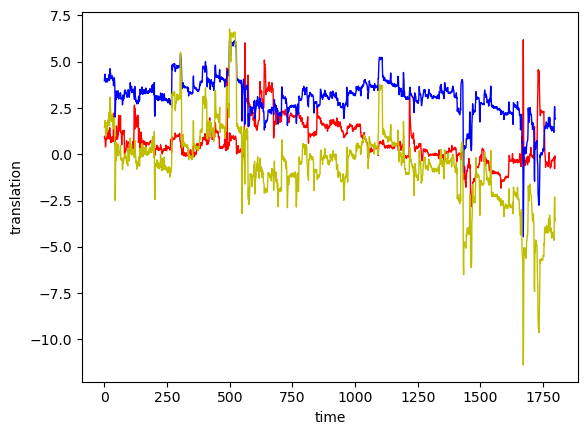

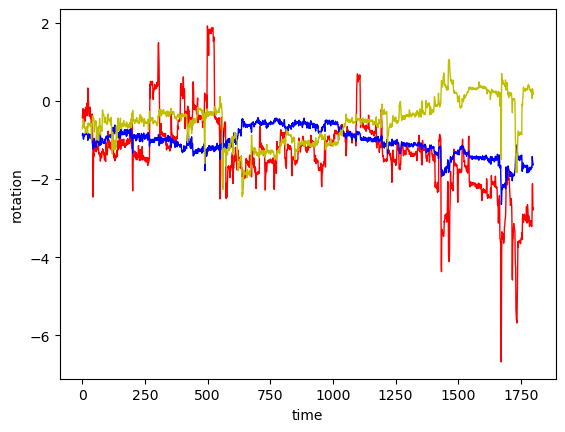

In [27]:
#plot network predictions
x1=range(1800)
plt.plot(x1,trans_x_n,label='trans_x',linewidth=1,color='r') 
plt.plot(x1,trans_y_n,label='trans_y',linewidth=1,color='b')
plt.plot(x1,trans_z_n,label='trans_z',linewidth=1,color='y')  
plt.xlabel('time') 
plt.ylabel('translation') 
plt.show()
x1=range(1800)
plt.plot(x1,rot_x_n,label='rot_x',linewidth=1,color='r') 
plt.plot(x1,rot_y_n,label='rot_y',linewidth=1,color='b')
plt.plot(x1,rot_z_n,label='rot_z',linewidth=1,color='y')  
plt.xlabel('time') 
plt.ylabel('rotation') 
plt.show()

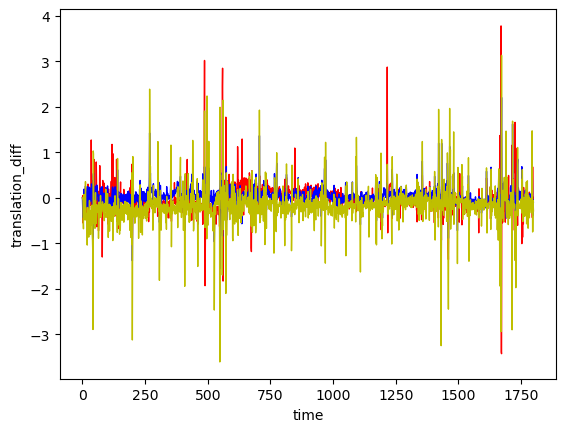

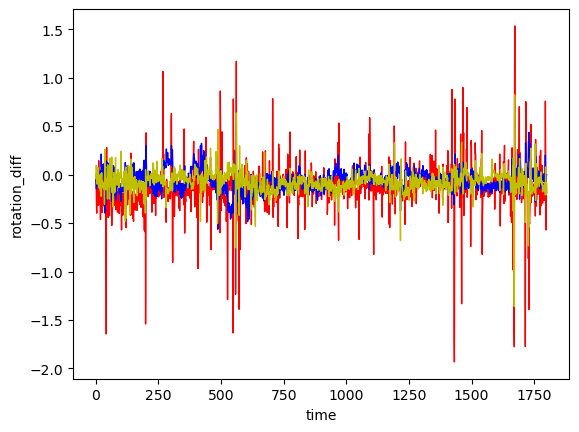

In [28]:
#plot difference between network predictions and vicra
trans_x_d = trans_x - trans_x_n
trans_y_d = trans_y - trans_y_n
trans_z_d = trans_z - trans_z_n
plt.plot(x1,trans_x_d,label='trans_x',linewidth=1,color='r') 
plt.plot(x1,trans_y_d,label='trans_y',linewidth=1,color='b')
plt.plot(x1,trans_z_d,label='trans_z',linewidth=1,color='y')
plt.xlabel('time') 
plt.ylabel('translation_diff') 
plt.show()

rot_x_d = rot_x - rot_x_n
rot_y_d = rot_y - rot_y_n
rot_z_d = rot_z - rot_z_n
plt.plot(x1,rot_x_d,label='rot_x',linewidth=1,color='r') 
plt.plot(x1,rot_y_d,label='rot_y',linewidth=1,color='b')
plt.plot(x1,rot_z_d,label='rot_z',linewidth=1,color='y')
plt.xlabel('time') 
plt.ylabel('rotation_diff')
plt.show()

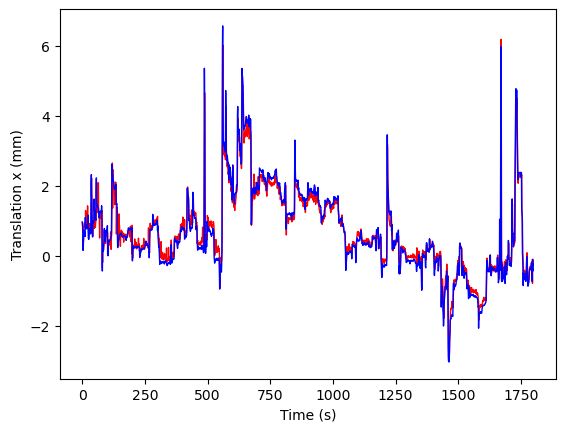

In [29]:
#plot trans_x
plt.plot(x1,trans_x_n,label='trans_x',linewidth=1,color='r') 
plt.plot(x1,trans_x,label='trans_x',linewidth=1,color='b') 
plt.xlabel('Time (s)') 
plt.ylabel('Translation x (mm)') 
plt.savefig('trans_x.pdf')
plt.show()

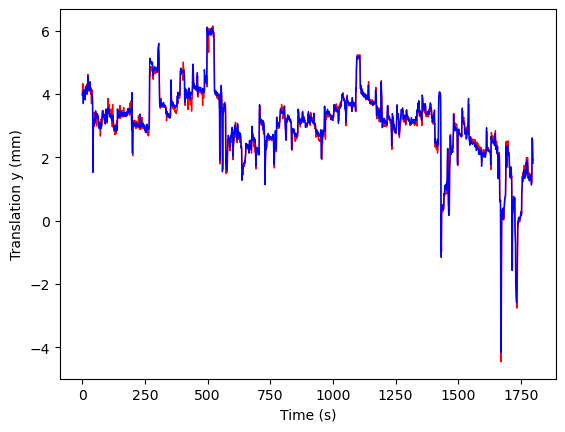

In [30]:
#plot trans_y
plt.plot(x1,trans_y_n,label='trans_y',linewidth=1,color='r') 
plt.plot(x1,trans_y,label='trans_y',linewidth=1,color='b') 
plt.xlabel('Time (s)') 
plt.ylabel('Translation y (mm)') 
plt.savefig('trans_y.pdf')
plt.show()

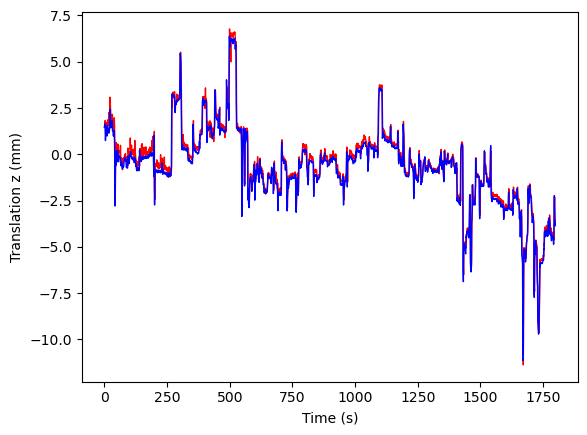

In [31]:
#plot trans_z
plt.plot(x1,trans_z_n,label='trans_z',linewidth=1,color='r') 
plt.plot(x1,trans_z,label='trans_z',linewidth=1,color='b') 
plt.xlabel('Time (s)') 
plt.ylabel('Translation z (mm)') 
plt.savefig('trans_z.pdf')
plt.show()

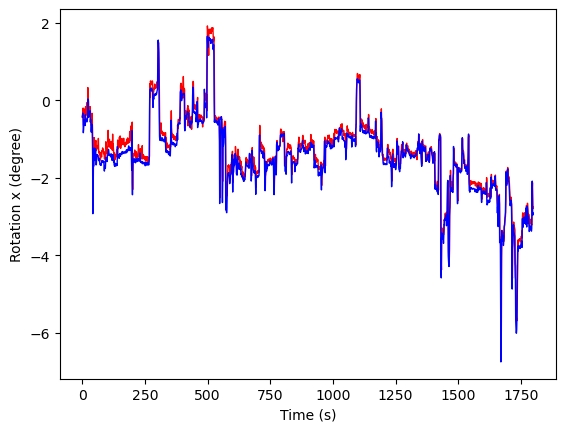

In [32]:
#plot rot_x
plt.plot(x1,rot_x_n,label='rot_x',linewidth=1,color='r')
plt.plot(x1,rot_x,label='rot_x',linewidth=1,color='b')
plt.xlabel('Time (s)') 
plt.ylabel('Rotation x (degree)') 
plt.savefig('rot_x.pdf')
plt.show()

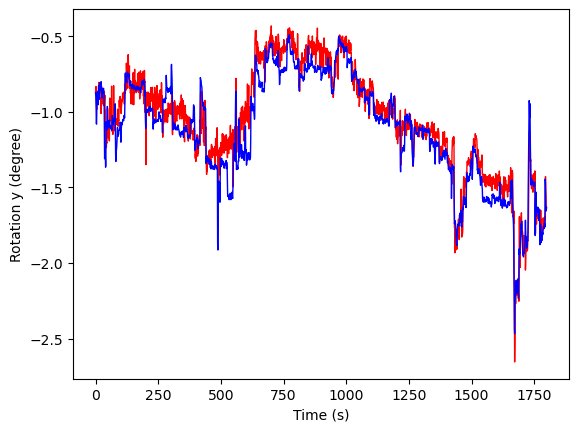

In [33]:
#plot rot_y
plt.plot(x1,rot_y_n,label='rot_y',linewidth=1,color='r')
plt.plot(x1,rot_y,label='rot_y',linewidth=1,color='b')
plt.xlabel('Time (s)') 
plt.ylabel('Rotation y (degree)') 
plt.savefig('rot_y.pdf')
plt.show()

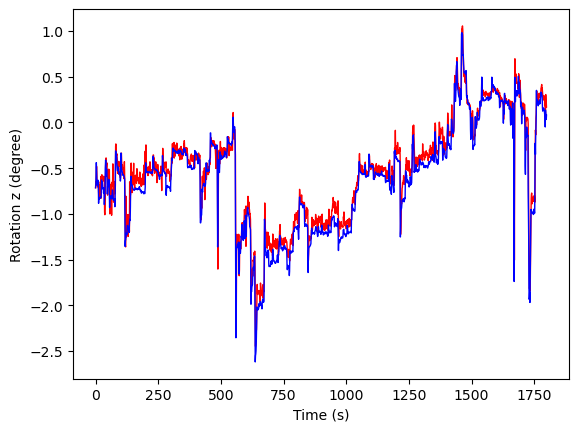

In [34]:
#plot rot_z
plt.plot(x1,rot_z_n,label='rot_z',linewidth=1,color='r')
plt.plot(x1,rot_z,label='rot_z',linewidth=1,color='b')
plt.xlabel('Time (s)') 
plt.ylabel('Rotation z (degree)') 
plt.savefig('rot_z.pdf')
plt.show()

In [ ]:
#save synthetic vicra information to txt file
output_n = np.zeros((1800,6),dtype=np.float)
for i in range(1800):
    output_n[i][0] = trans_x_n[i]
    output_n[i][1] = trans_y_n[i]
    output_n[i][2] = trans_z_n[i]
    output_n[i][3] = rot_x_n[i]
    output_n[i][4] = rot_y_n[i]
    output_n[i][5] = rot_z_n[i]
np.savetxt('synthetic_vicra_dp_multrain_LW935.txt',output_n,fmt='%0.6f')